In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df=pd.read_csv("Algerian_forest_fires_dataset.csv")

In [6]:
df.head()



,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0.0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0.0


In [7]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [9]:
df.drop(['day','month','year'],axis=1,inplace=True)

In [10]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0.0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0.0


In [11]:
df['Classes'].value_counts()

Classes
fire             131
not fire         100
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [12]:
df['Classes']=np.where(df['Classes'].str.contains("not fire"),0,1)

In [13]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0.0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0.0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0.0


In [14]:
df['Classes'].value_counts()


Classes
1    137
0    105
Name: count, dtype: int64

In [16]:
X=df.drop("FWI",axis=1)
y=df['FWI']
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0.0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0.0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0.0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0.0


In [17]:
y


0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
237    6.5
238    0.0
239    0.2
240    0.7
241    0.5
Name: FWI, Length: 242, dtype: float64

In [19]:
##train test splits
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=25)

In [21]:
X_train.shape,X_test.shape

((181, 11), (61, 11))

In [22]:
##feature selection
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.624417,-0.189972,-0.285035,0.648430,0.428356,0.321912,0.579085,0.399563,0.478931,0.255216
RH,-0.624417,1.000000,0.171827,0.197173,-0.623356,-0.353300,-0.160578,-0.650968,-0.289410,-0.404467,-0.412282
Ws,-0.189972,0.171827,1.000000,0.084023,-0.044444,0.075643,0.154245,0.090038,0.111878,0.007518,-0.163305
Rain,-0.285035,0.197173,0.084023,1.000000,-0.558084,-0.314169,-0.301511,-0.356869,-0.319406,-0.373641,0.001474
FFMC,0.648430,-0.623356,-0.044444,-0.558084,1.000000,0.597896,0.475621,0.739460,0.575900,0.757497,0.243596
DMC,0.428356,-0.353300,0.075643,-0.314169,0.597896,1.000000,0.878199,0.668461,0.981426,0.586700,0.133731
DC,0.321912,-0.160578,0.154245,-0.301511,0.475621,0.878199,1.000000,0.474351,0.942572,0.484666,-0.146444
ISI,0.579085,-0.650968,0.090038,-0.356869,0.739460,0.668461,0.474351,1.000000,0.623252,0.738917,0.250731
BUI,0.399563,-0.289410,0.111878,-0.319406,0.575900,0.981426,0.942572,0.623252,1.000000,0.578837,0.021431
Classes,0.478931,-0.404467,0.007518,-0.373641,0.757497,0.586700,0.484666,0.738917,0.578837,1.000000,0.173996


<Axes: >

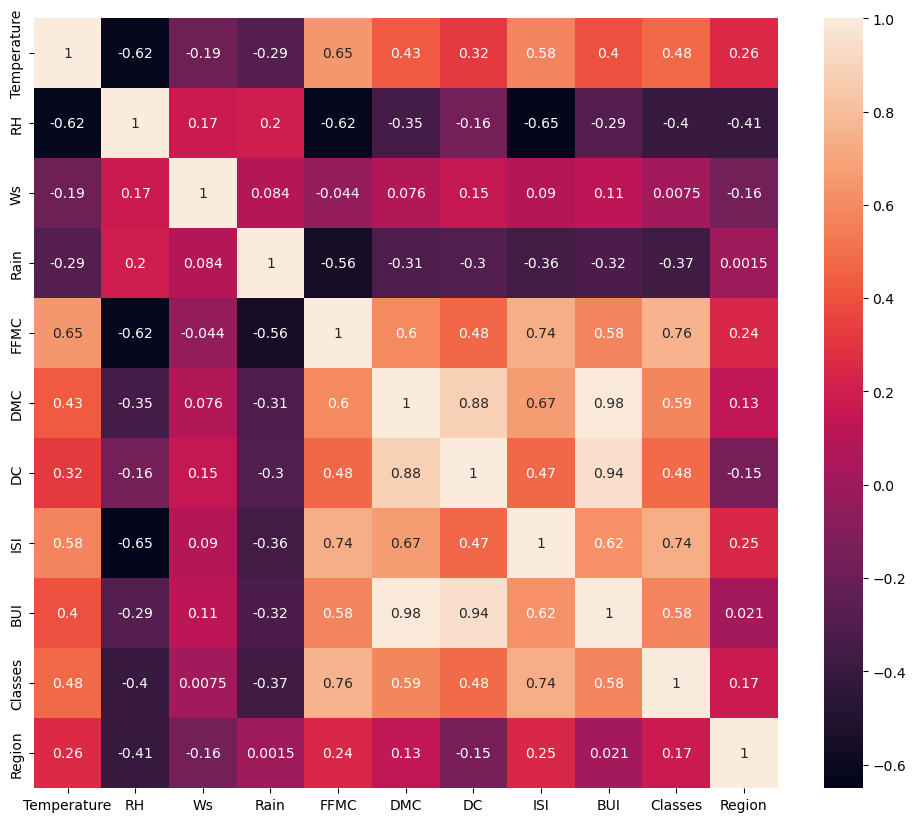

In [24]:
##check for multicollinearlity
plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr,annot=True)

In [28]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [37]:
corr_feautres=correlation(X_train,0.80)

In [38]:
##drop features when correlation is more than 0.85
X_train.drop(corr_feautres,axis=1,inplace=True)
X_test.drop(corr_feautres,axis=1,inplace=True)
X_train.shape,X_test.shape


((181, 9), (61, 9))

In [42]:
##feature scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [43]:
X_train_scaled

array([[ 0.76715617, -0.12930104, -0.16603443, ...,  0.88433214,
         0.9       , -0.98356052],
       [ 1.04266265, -0.26616354,  1.33657718, ...,  1.13241663,
         0.9       , -0.98356052],
       [ 0.49164969, -0.26616354,  0.96092427, ...,  0.83471524,
         0.9       ,  1.01671425],
       ...,
       [-0.33486976,  0.00756146, -0.16603443, ..., -0.20723965,
         0.9       ,  1.01671425],
       [ 0.76715617, -0.47145729, -1.29299314, ..., -0.72821709,
        -1.11111111, -0.98356052],
       [-1.43689568, -0.26616354,  0.58527137, ...,  1.00837438,
         0.9       ,  1.01671425]], shape=(181, 9))

Text(0.5, 1.0, 'X_train after scaling')

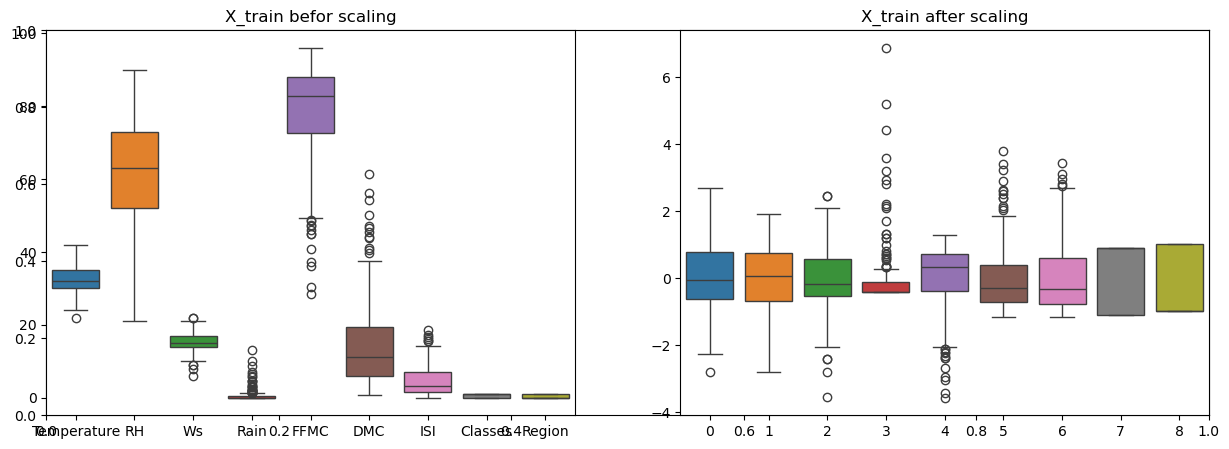

In [45]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title("X_train befor scaling")
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title("X_train after scaling")

Mean absolute error 33.39196135436481
R2 score -38.58949331637176


C:\Users\sakshi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


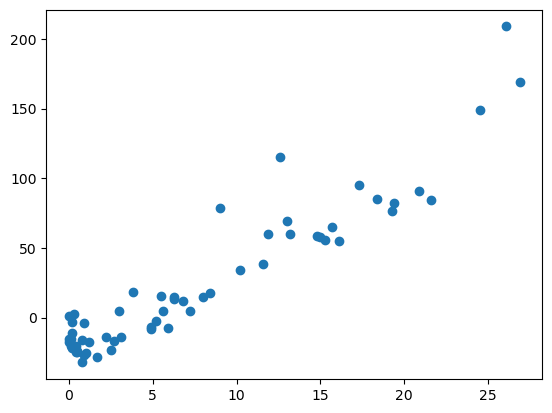

In [49]:
##linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg=LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred=linreg.predict(X_test)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error",mae)
print("R2 score",score)
plt.scatter(y_test,y_pred)

Mean absolute error 33.39196135436481
R2 score -38.58949331637176


C:\Users\sakshi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


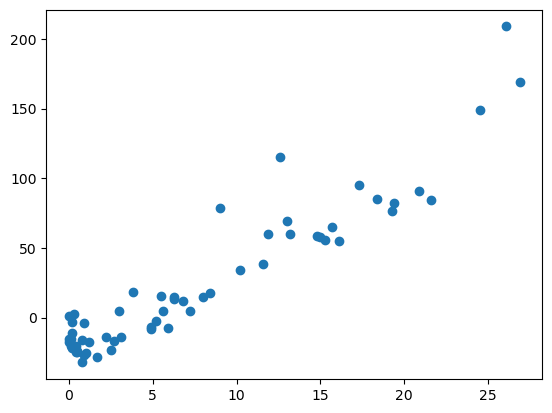

In [50]:
##lasso regression

from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso=Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred=linreg.predict(X_test)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error",mae)
print("R2 score",score)
plt.scatter(y_test,y_pred)

Mean absolute error 33.39196135436481
R2 score -38.58949331637176


C:\Users\sakshi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


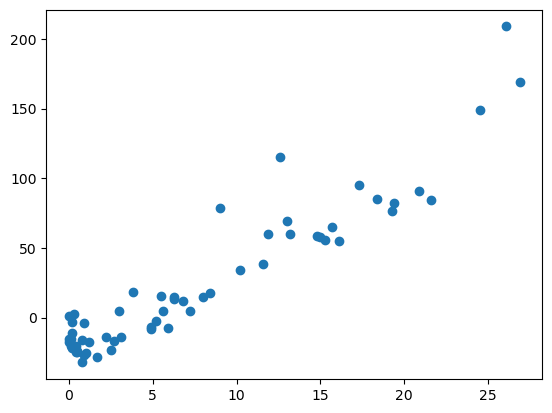

In [53]:
##ridge regression model
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge=Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred=linreg.predict(X_test)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error",mae)
print("R2 score",score)
plt.scatter(y_test,y_pred)

Mean absolute error 33.39196135436481
R2 score -38.58949331637176


C:\Users\sakshi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


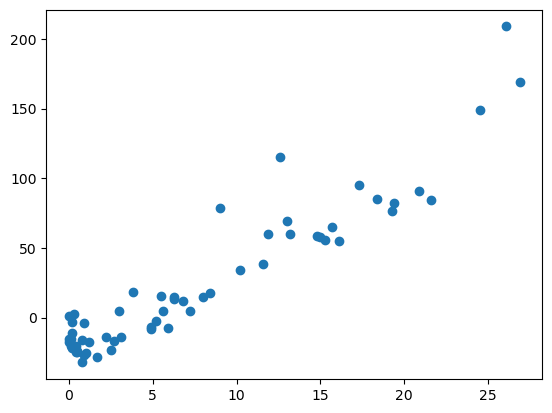

In [52]:
##elastic net

from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elasnet=ElasticNet()
elasnet.fit(X_train_scaled,y_train)
y_pred=linreg.predict(X_test)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error",mae)
print("R2 score",score)
plt.scatter(y_test,y_pred)

In [56]:
##cross validation lasso
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(X_train_scaled,y_train)

,eps,0.001
,n_alphas,'deprecated'
,alphas,'warn'
,fit_intercept,True
,precompute,'auto'
,max_iter,1000
,tol,0.0001
,copy_X,True
,cv,5
,verbose,False
,n_jobs,None


In [58]:
lassocv.alphas_

array([6.83718251, 6.37637929, 5.94663267, 5.54584953, 5.17207783,
       4.82349709, 4.49840953, 4.19523179, 3.91248721, 3.64879866,
       3.40288184, 3.173539  , 2.95965309, 2.76018238, 2.57415532,
       2.40066587, 2.23886903, 2.08797675, 1.9472541 , 1.81601569,
       1.69362231, 1.57947784, 1.47302632, 1.37374927, 1.28116317,
       1.19481706, 1.11429039, 1.03919095, 0.96915295, 0.90383529,
       0.84291982, 0.78610984, 0.73312867, 0.68371825, 0.63763793,
       0.59466327, 0.55458495, 0.51720778, 0.48234971, 0.44984095,
       0.41952318, 0.39124872, 0.36487987, 0.34028818, 0.3173539 ,
       0.29596531, 0.27601824, 0.25741553, 0.24006659, 0.2238869 ,
       0.20879767, 0.19472541, 0.18160157, 0.16936223, 0.15794778,
       0.14730263, 0.13737493, 0.12811632, 0.11948171, 0.11142904,
       0.10391909, 0.0969153 , 0.09038353, 0.08429198, 0.07861098,
       0.07331287, 0.06837183, 0.06376379, 0.05946633, 0.0554585 ,
       0.05172078, 0.04823497, 0.0449841 , 0.04195232, 0.03912

In [59]:
lassocv.mse_path_

array([[55.31271021, 59.81165182, 55.24860468, 32.46084884, 65.00067636],
       [50.23093464, 56.72066209, 49.57238859, 28.89178159, 62.19128603],
       [44.09892737, 49.94044324, 44.58091442, 25.77790165, 55.29468974],
       [38.70105588, 44.07436199, 40.18867311, 23.06057332, 49.31994892],
       [33.99503649, 38.55342836, 35.65410671, 19.92756459, 44.14540266],
       [29.89142893, 33.43425066, 31.53528967, 17.21768494, 39.66534352],
       [26.31258757, 28.99895696, 27.92888119, 14.88210388, 34.82005499],
       [23.19076565, 25.15697224, 24.76960347, 12.87108951, 30.49337943],
       [20.46705113, 21.83043388, 22.00074089, 11.14077206, 26.72825647],
       [18.09016387, 18.95096392, 19.57286248,  9.65332595, 23.45173302],
       [16.01539247, 16.45940218, 17.44263694,  8.37593781, 20.60029064],
       [14.20402675, 14.30435687, 15.57301396,  7.28014769, 18.11818817],
       [12.62215362, 12.44118844, 13.93096235,  6.34108427, 15.95839308],
       [11.2403154 , 10.83094059, 12.4

In [ ]:
##ridge regression model
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge=Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred=linreg.predict(X_test)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error",mae)
print("R2 score",score)
plt.scatter(y_test,y_pred)

Mean absolute error 33.39196135436481
R2 score 0.9318357155513336


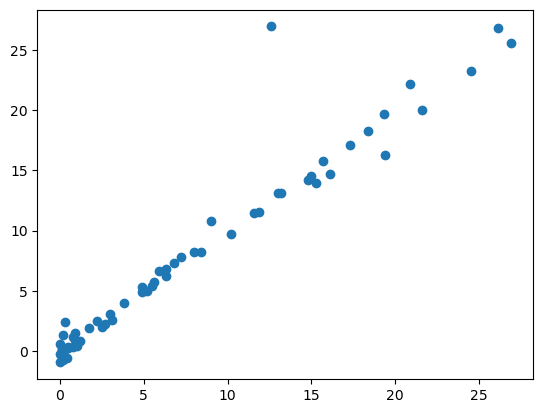

In [61]:
y_pred=lassocv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mea=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error",mae)
print("R2 score",score)

Mean absolute error 33.39196135436481
R2 score 0.9318357155513336


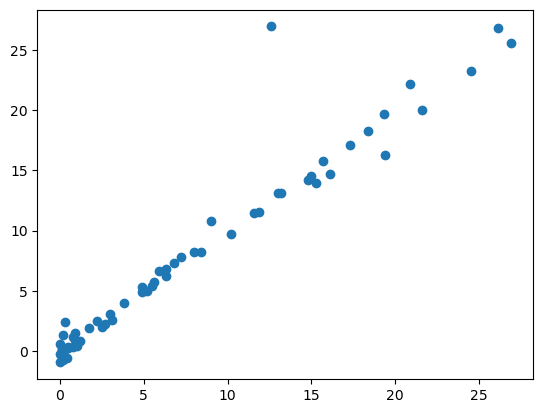

In [62]:
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(cv=5)
ridgecv.fit(X_train_scaled,y_train)
plt.scatter(y_test,y_pred)
mea=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error",mae)
print("R2 score",score)

Mean absolute error 33.39196135436481
R2 score 0.9318357155513336


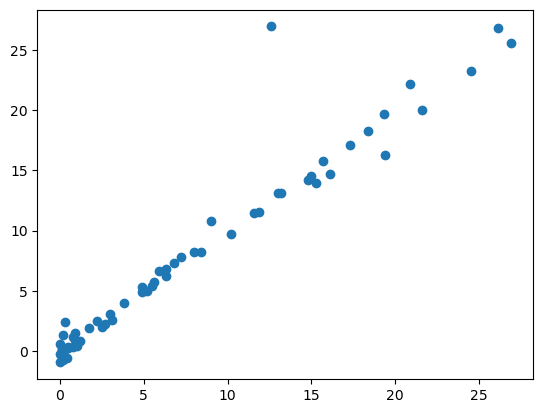

In [63]:
from sklearn.linear_model import ElasticNetCV
elasnetcv=ElasticNetCV(cv=5)
elasnetcv.fit(X_train_scaled,y_train)
plt.scatter(y_test,y_pred)
mea=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error",mae)
print("R2 score",score)